# DAV 6150 Module 7 Assignment - Logistic Regression
Brian Livian, Alejandra Zapata, Ke Chen

## 1. Introduction 
The data set from Federal Reserve Bank of Boston regarding the mortgage loan approval will be used for analyzing if model generating. There are totally 13 variables in the data set. 12 will be used as explanatory variables and 1 will be used as response variable. According to the introduction of data set from https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html, the explanatory variables are:
- dir: indicating the applicant's debt payments to total income ratio.
- hir: indicating the applicant's housing expenses to income ratio.
- lvr: indicating the applicant's ratio of size of loan to assessed value of property.
- ccs: consumer credit score from 1 to 6 (a low value being a good score).
- mcs: mortgage credit score from 1 to 4 (a low value being a good score).
- pbcr: if the applicant had public bad credit record.
- dmi: if the applicant had denied mortgage insurance.
- self: if the applicant was self-employed.
- single: if the applicant is single.
- uria: 1989 Massachusetts unemployment rate in the applicant's industry.
- condominium: if the unit a condominium. (Original data use column name condominiom)
- black: is the applicant black?
The response variable is 
- deny: if mortgage application denied.

The planned steps will be addressed below:

- 1. Perform exploratory data analysis and general overview of the data set.
- 2. Deal with the missing values and outliers, have data transformation if needed.
- 3. Based on the EDA results, select/combine the features to reduce the numbers of the explanatory variables of the regression model in 3 different ways.
- 4. Applying the reduced features to perform binomial regression model, the performance of the model will be evaluated by cross-validation and select the preferred model. 

First things first, the data set will be imported as pandas data frame.

In [1]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# read data as data frame
path=r'https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M7_Data.csv'
df=pd.read_csv(path)
# check result
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


## 2. Exploratory Data Analysis
While the first column is the number of observations, which is useless for the modelling work. Therefore, we will drop that column and check the basic information of the remaining columns.

In [2]:
# drop Unnamed column
df=df.iloc[:,1:]
# general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


In [3]:
# check null values
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

There are totally 2381 observations in the data set. 2 missing values were found. 'pbcr' and 'self' each have a missing value. 6 columns with float64 type of data, which are ratios or credit scores based on our domain knowledge, are numeric data. While the other columns are yes/no or 0/1 (also means yes/no) data, which are categorical.

#### Numeric  Variables

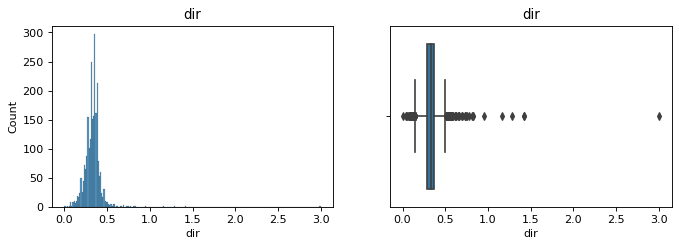

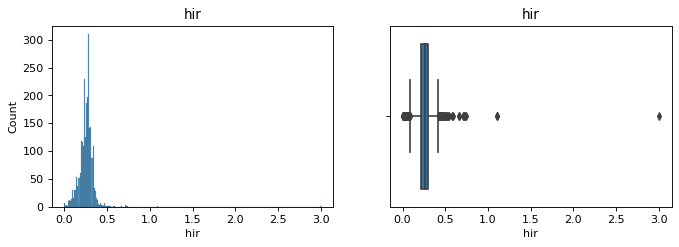

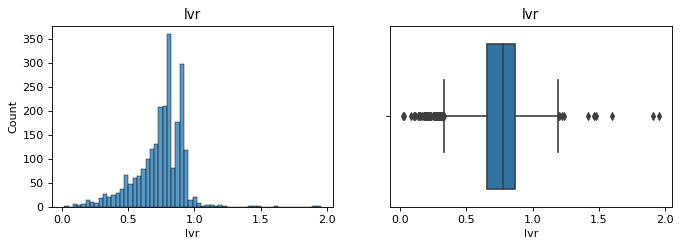

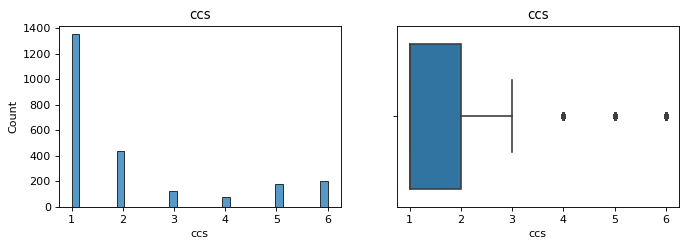

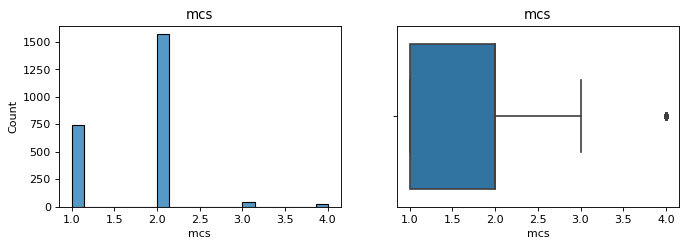

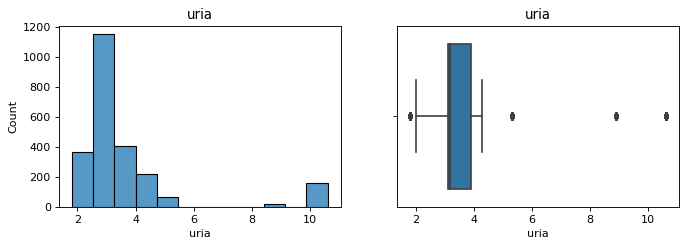

In [4]:
# Plot numeric data
import seaborn as sns
for i in range(0,5):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

figure(figsize=(10, 3), dpi=80)
plt.subplot(1,2,1)
sns.histplot(x = df.iloc[:,9], bins= 12)
plt.title(df.columns[9])
plt.subplot(1,2,2)
sns.boxplot(x = df.iloc[:,9])
plt.title(df.columns[9])
plt.show()

The dir and hir are right skewed, with outliers on the right tail. These outliers appear to be valid, but very special situation, as the ratio should be between 0%-100%. Some individuals with very high debt to income ratio and high house price to income ratio respectively is a very special case. lvr is left skew, with outliers on the right tail as well. These outliers represent individuals with loan to property value ratio, and appear to be valid data points, but over 100% will be taken as very special case. uria is right skew, with outliers on the right-hand side as well, representing individuals with high unemployment rates in their industry. Any values over 1 will be invalid. Most consumer credit scores are 1, while most mortgage credit scores are 2. 

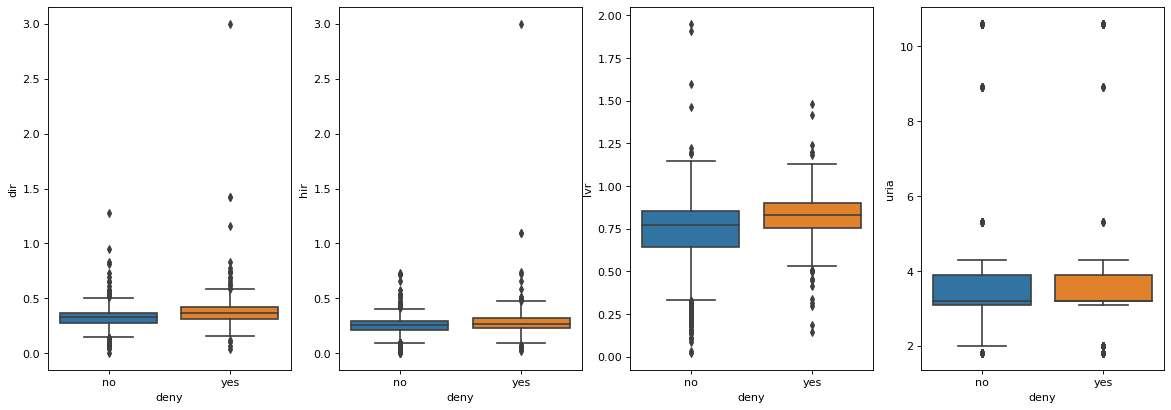

In [5]:
# Boxplot of continuous data separated based on 'deny'
figure(figsize=(18,6), dpi=80)
plt.subplot(1,4,1)
sns.boxplot(x = 'deny', y = 'dir', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'deny', y = 'hir', data = df)
plt.subplot(1,4,3)
sns.boxplot(x = 'deny', y = 'lvr', data = df)
plt.subplot(1,4,4)
sns.boxplot(x = 'deny', y = 'uria', data = df)
plt.show()

Although the outliers make the boxplots slightly hard to interpret based on size, the boxplots for continuous data separated based on 'deny' shows denied mortgages have slightly higher debt to income ratios, housing expenses to income ratios, loan to property value ratios, and unemployment rates. These all make sense intuitively.

#### Categorical Variables

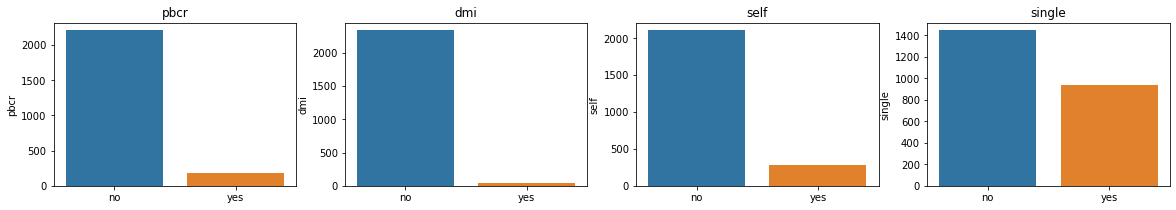

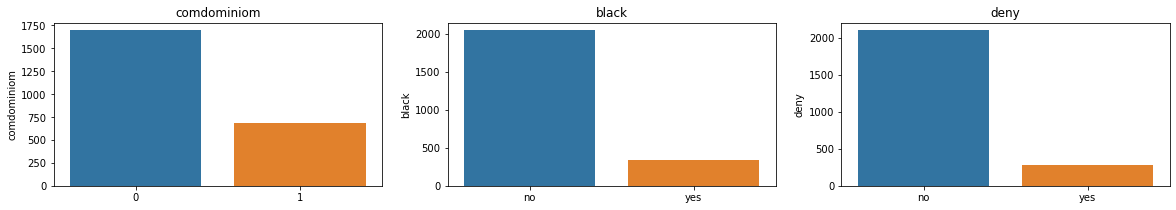

In [6]:
# Plot categorical data
# variable number 3-5
figure(figsize=(20, 3))
for i in range(5,9):
    plt.subplot(1, 4, i-4)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

# variable number 10-12
figure(figsize=(20, 3))
for i in range(10,13):
    plt.subplot(1, 3, i-9)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Each of the categorical attributes are shown below. All of the other attributes are binary with observations for yes and no, except for condominiom which is binary with 0 and 1. Each of the attributes have significantly higher observations for 'no', while it is unclear whether 0 or 1 signifies true or false with condominiom. We will assume 1 signifies true while 0 signifies false based on data science industry standard of binary as well as domain knowledge. It makes sense intuitively that most loans are not for condominiums, being that the proportion of condominium properties is a small subset of properties on the market.

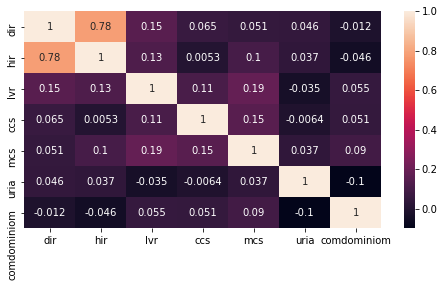

In [7]:
# Heatmap of correlation
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# show the correlation coefficient of each variables
df.corr()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
dir,1.000000,0.781473,0.150653,0.065234,0.051318,0.046450,-0.012451
hir,0.781473,1.000000,0.126273,0.005277,0.104721,0.036992,-0.046039
lvr,0.150653,0.126273,1.000000,0.111939,0.186326,-0.034643,0.055001
ccs,0.065234,0.005277,0.111939,1.000000,0.152686,-0.006424,0.050742
mcs,0.051318,0.104721,0.186326,0.152686,1.000000,0.037077,0.090462
uria,0.046450,0.036992,-0.034643,-0.006424,0.037077,1.000000,-0.100647
comdominiom,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.100647,1.000000


From the correlation coefficient table, we found that the 'hir' and 'dir' have very strong correlation. Therefore, in the feature selection part, it is wise to only keep one to avoid duplicate information. Other variables have less correlation coefficient. It means the other variables are considered to be independent, which fulfill the requirement of binomial logistic regression.

## 3. Data Preparation
### 3.1 Missing Value and Outliers
The 2 Nan values, as well as the invalid values for ccs and mcs are found in 1 observation. Removing 1 observation from the dataset should make little difference to the distribution, as well as the machine learning algorithm. Also, the extreme special cases will be removed below. The outliers will be removed based on domain knowledge. 

Source:
https://www.savingforcollege.com/article/student-loan-101-what-is-debt-to-income-ratio

In [9]:
# delete missing values
df=df.dropna()

# remove the outliers
df=df.loc[(df['dir'] <= 1) & (df['hir'] <= 1) & (df['uria'] <= 100)]

### 3.2 Dealing with Categorical Variables
The categorical variables with yes/no values need to be changed to 0 and 1. 0 means no, while 1 means yes.

In [10]:
# Creating dummy variables for logistic regression
# Signify the dummy variables by the capital version of their original column name
df['PBCR'] = (df['pbcr'] == 'yes').astype(int) 
df['DMI'] = (df['dmi'] == 'yes').astype(int) 
df['SELF'] = (df['self'] == 'yes').astype(int)
df['SINGLE'] = (df['single'] == 'yes').astype(int) 
df['BLACK'] = (df['black'] == 'yes').astype(int) 
df['DENY'] = (df['deny'] == 'yes').astype(int)

# Dropping old columns with 'yes' and 'no' observations
df = df.drop('pbcr', axis=1)
df = df.drop('dmi', axis=1)
df = df.drop('self', axis=1)
df = df.drop('single', axis=1)
df = df.drop('black', axis=1)
df = df.drop('deny', axis=1)

# sanity check
df.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,PBCR,DMI,SELF,SINGLE,BLACK,DENY
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0,0


## 4. Prepped Data Review
After the data preparation, we will re-run the EDA according to the same code with section 2.

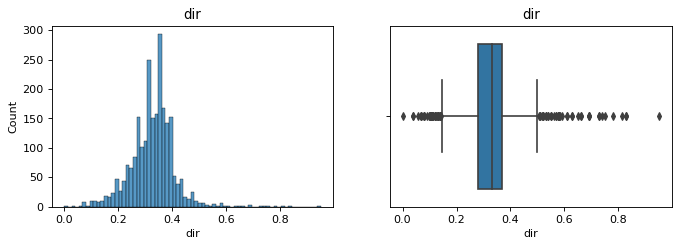

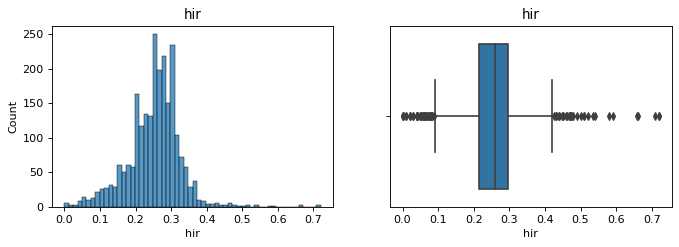

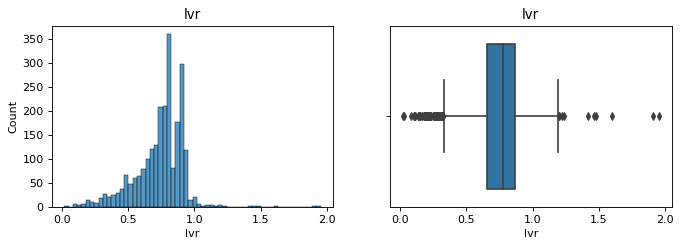

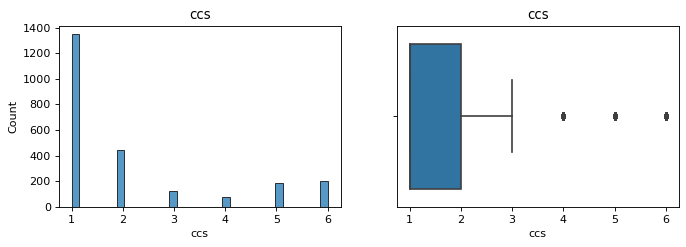

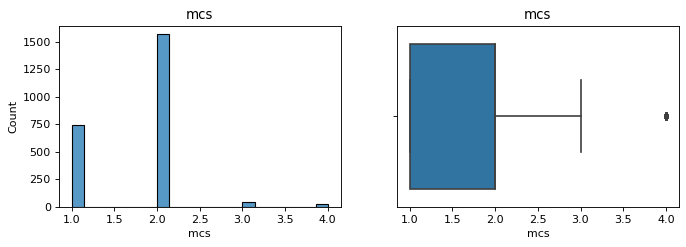

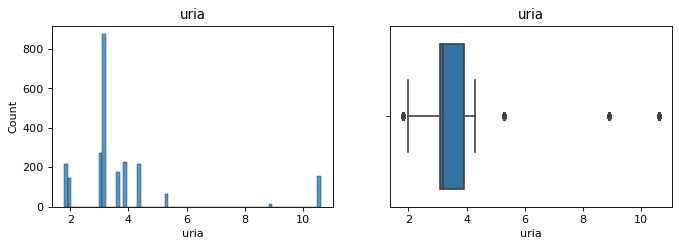

In [11]:
# Plot numeric data
for i in range(0,6):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

The outliers of numeric variables are dropped.

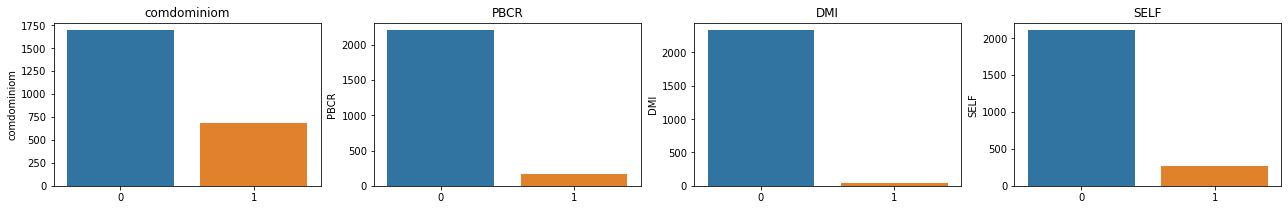

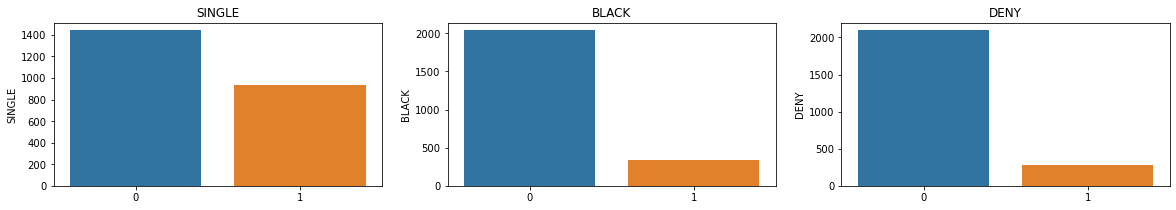

In [12]:
# Plot categorical data
figure(figsize=(22, 3))
for i in range(6,10):
    plt.subplot(1, 4, i-5)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

figure(figsize=(20, 3))
for i in range(10,13):
    plt.subplot(1, 3, i-9)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

The categorical data changed narrative to dummy variables 0 and 1.

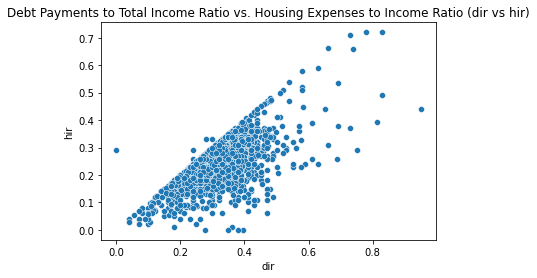

In [13]:
# Plot dir vs hir
figure(figsize=(6, 4))
sns.scatterplot(x = df['dir'], y = df['hir'])
plt.title('Debt Payments to Total Income Ratio vs. Housing Expenses to Income Ratio (dir vs hir)')
plt.show()

The dir and hir still show very high correlation. For feature selection, if they are both selected, it is better to take off one of them manually.

## 5. Regression Modeling
In this section, 3 kinds of feature selection method will be used to select 3 groups of features for modelling. The feature selection methods include:
- 1. Backward Elimination
- 2. Random Forest
- 3. Mutual Information

### 5.1 Model Based on Backward Elimination Feature Selection

In [14]:
# set the explanatory variables and response variable
X = df[['dir','lvr','ccs','mcs','uria','comdominiom','PBCR','SELF','DMI','SINGLE','BLACK']]
y = df['DENY']

In [16]:
# apply code block for backward elimination feature selection
'''**********************************
Original code cited from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
*************************************'''
import statsmodels.api as sm
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    # sm requires that have an additional variable with a constant of one
    X_1 = sm.add_constant(X_1)
    # selection based on Logit
    model = sm.Logit(y,X_1).fit()
    # selects all as feature variables
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # iterates and removes variables that are not a good fit
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.266754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.266760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267324
         Iterations 7
['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']


From the selection result, the 9 variables ('dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK') will be used for the first Binary Logistic Regression model.

In [17]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# define a vector containing the names of the attributes to use
X_BE = df[['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']]
y = df['DENY']
# split training and testing sets
X_BE_train, X_BE_test, y_BE_train, y_BE_test = train_test_split(X_BE, y, test_size=0.2)

# create the model
model_BE = LogisticRegression()

# apply cross-validation to test the 
scores_BE_acc = cross_val_score(model_BE, X_BE_train, y_BE_train, cv=5, scoring='accuracy')
scores_BE_pre = cross_val_score(model_BE, X_BE_train, y_BE_train, cv=5, scoring='precision')
# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_BE_acc.mean())
print (scores_BE_pre.mean())

0.9047368421052632
0.7502159244264508


In [18]:
# use the training set fit the model
model_BE.fit(X_BE_train, y_BE_train)
model_BE.coef_

array([[2.78312348, 1.65779293, 0.28756218, 0.06664663, 1.30420112,
        0.71493519, 3.25608272, 0.48517583, 0.74220293]])

From this model, all coefficients of the explanatory variables show positive values. 
- The higher dir (debt payments to total income ratio), the more likely the application being denied, as higher debt is a burden for applicants and also risky for the bank to get the payments on time. 
- The higher lvr (ratio of size of loan to assessed value of property), the more likely the application being denied, as higher lvr means applicanst have a lack of down payments and need to bear larger monthly principal and interests. It is risky for banks to get the payments on time as well.
- The higher ccs (consumer credit score from 1 to 6 (a low value being a good score), the more likely the application being denied, as higher score means poor credit. The applicants have a history of not paying their bills on time or owe too much money. It is a better choice than not lending them money. The money might never come back.
- The higher uria (1989 Massachusetts unemployment rate in the applicant's industry), the more likely the application being denied, as high unemployment rate means the applicant has a high likelihood to be unemployed and lose the incoming source to pay the mortgage.
- The "yes" for PBCR (public bad credit record), the more likely the application being denied. It is the same concept as ccs.
- The "yes" for SELF (self-employed), the more likely the application being denied. Self-employed might not be considered having steady income sources.
- The "yes" DMI (denied mortgage insurance), the more likely the application being denied. Mortgage insurance protects the lender and allows borrowers making a down payment of less than 20% to still qualify for a home loan. Therefore, applicants who are denied mortgage insurance that need it are also likely to be declined for their loan.
- The "yes" SINGLE (marital status is not married), the more likely the application being denied. It is not intuitive as we cannot define a person's incoming situation by the marital status. Many low income families which are hard to pay the mortgage are married families. This feature might be overestimated.
- The "yes" BLACK (race is African American), the more likely the application being denied. It is not intuitive as we cannot define a person's incoming situation by race. If this feature was considered, it did show the bank have racial discrimination. 

### 5.2 Model Based on Random Forest Feature Selection

In [19]:
'''**********************************
Code was from https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
**************************************'''
# import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
# split the training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply the feature selection
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['dir', 'lvr', 'ccs', 'uria', 'DMI'], dtype='object')


From the selection result, the 5 variables ('dir', 'lvr', 'ccs', 'uria', 'DMI') will be used for the first Binary Logistic Regression model.

In [20]:
from sklearn.linear_model import LogisticRegression
# define a vector containing the names of the attributes to use
X_RF = df[['dir', 'lvr', 'ccs', 'uria', 'DMI']]
y = df['DENY']
from sklearn.model_selection import train_test_split
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y, test_size=0.2)

# set the model
model_RF = LogisticRegression()

# import the cross_val_score function
from sklearn.model_selection import cross_val_score
scores_RF_acc = cross_val_score(model_RF, X_RF_train, y_RF_train, cv=5, scoring='accuracy')
scores_RF_pre = cross_val_score(model_RF, X_RF_train, y_RF_train, cv=5, scoring='precision')

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_RF_acc.mean())
print (scores_RF_pre.mean())

0.8973684210526317
0.8842063492063492


In [21]:
# use the training set fit the model
model_RF.fit(X_RF_train, y_RF_train)
model_RF.coef_

array([[2.56594409, 1.51406511, 0.39030036, 0.07197057, 3.46575463]])

From this model, all coefficients of the explanatory variables show positive values. 
The direction of the coefficients was all included in the first model.

### 5.3 Model Based on Mutual Information

In [22]:
'''**********************************
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028
*************************************'''
# import libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
# define the variables
X = df[['dir','lvr','ccs','mcs','uria','comdominiom','PBCR','SELF','DMI','SINGLE','BLACK']]
y= df['DENY']
# split variables
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply feature selection
sel_classif = SelectKBest(mutual_info_classif, k=5)
X_train_mutual = sel_classif.fit_transform(X_train, y_train)
print(sel_classif.get_support())

selected_feat_classif= X_train.columns[(sel_classif.get_support())]
print(selected_feat_classif)

[ True  True  True False False False False False  True False  True]
Index(['dir', 'lvr', 'ccs', 'DMI', 'BLACK'], dtype='object')


From the selection result, the 5 variables ('dir', 'lvr', 'ccs', 'PBCR', 'DMI') will be used for the first Binary Logistic Regression model.

In [23]:
from sklearn.linear_model import LogisticRegression
# define a vector containing the names of the attributes to use
X_SKB = df[['dir', 'lvr', 'ccs', 'PBCR', 'DMI']]
y= df['DENY']
from sklearn.model_selection import train_test_split
X_SKB_train, X_SKB_test, y_SKB_train, y_SKB_test = train_test_split(X_SKB, y, test_size=0.2)

# set the model
model_SKB = LogisticRegression()

# cross-validating the model
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_SKB_acc = cross_val_score(model_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='accuracy')
scores_SKB_pre = cross_val_score(model_SKB, X_SKB_train, y_SKB_train, cv=5, scoring='precision')

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores_SKB_acc.mean())
print (scores_SKB_pre.mean())

0.9015789473684211
0.726068376068376


In [24]:
# use the training set fit the model
model_SKB.fit(X_SKB_train, y_SKB_train)
model_SKB.coef_

array([[2.96435394, 1.47389286, 0.34051567, 1.2561378 , 3.48506594]])

From this model, all coefficients of the explanatory variables show positive values. The direction of the coefficients were all included in the first model.

The similarity of direction of the variables reflects the models accurately detected the bank's real consideration of application. However, some features are not appropriate to be taken in to count in the model. As without that subjective personal information, the model can still work well.

## 6. Select Models
As the cased being denied is obviously less than the approved cases. Therefore, in section 5, we used two scores to evaluate the models. One is accuracy, the other is precision, which is more applicable for rare cases. We value precision more as the imbalanced distribution of the response variable. Under the similar accuracy, we prefer the model to have higher precision. 
Therefore, we consider the feature selected by Random Forest method has the best performance when modelling. The accuracy is almost 0.9, while the precision is also almost reaching 0.9. The precision is higher than the other two models, which are less than 0.8. We will use this model to see the performance on the testing set.

In [25]:
# use the training set fit the model
model_RF.fit(X_RF_train, y_RF_train)
# get the predicted values of y
y_pred = model_RF.predict(X_RF_test)

# check the accuracy and precision on the testing set
from sklearn.metrics import accuracy_score, precision_score
print("Accuracy:", accuracy_score(y_RF_test, y_pred))
print("Precision:", precision_score(y_RF_test, y_pred))

Accuracy: 0.9010526315789473
Precision: 0.9


The result shows a very high precision (0.9) and very high accuracy (0.9) on the testing set. The model also works well on the testing set.

## 7. Conclusions
Through Random Forest selection, 5 features were selected for binary logistic regression model generating. The prediction result can reach high precision and accuracy.

The selected explanatory variables include 'dir', 'lvr', 'ccs', 'uria', 'DMI'. The variables contain information reflecting the expenses and incoming ratio, loan percentage of the property intended to purchase, credit score, availability of work for incoming, and mortgage insurance denied. The information does not have potentially overlapped information.

The model does not include information regarding race, marital status and if self-employed. Therefore, the potential discrimination on these aspects was not found in this model.

## References
https://constructioncoverage.com/research/top-reasons-mortgage-loans-are-denied-2021<br>
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028<br>
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f<br>
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b<br>
https://www.savingforcollege.com/article/student-loan-101-what-is-debt-to-income-ratio